In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('default-data.csv',index_col=0,)

In [3]:
features_dict = {}
for i in range(len(df.columns)):
    features_dict[str(df.columns[i])] = df.iloc[0][i]

In [4]:
df = df.drop(index='ID')

In [5]:
df.head()
df = df.astype(float)

In [6]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


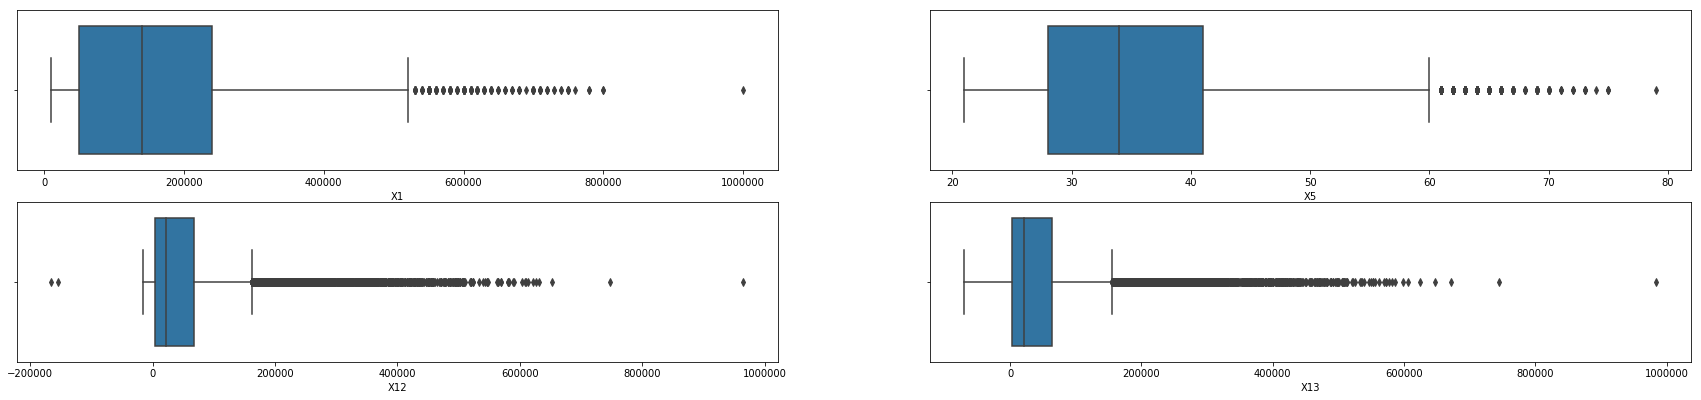

In [7]:
plt.figure(figsize=(30,10))

plt.subplot(3,2,1)
sns.boxplot(df['X1'])

plt.subplot(3,2,2)
sns.boxplot(df['X5'])

plt.subplot(3,2,3)
sns.boxplot(df['X12'])

plt.subplot(3,2,4)
sns.boxplot(df['X13'])

In [8]:
non_cat = ['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']

outliers=[]
for i in non_cat:
    z = np.abs(stats.zscore(df[[i]]))
    rows=np.where(z>3)
    outliers.append(rows[0])


In [9]:
outliers = [j for i in outliers for j in i]
len(outliers)

6578

In [10]:
outliers=list(dict.fromkeys(outliers))
outliers=[str(i) for i in outliers]
len(outliers)

2924

In [11]:
x_1 = df.drop(columns=['Y'])
y =df['Y']
X_train_1, X_test_1, y_train, y_test = train_test_split(x_1,y,test_size=0.2,random_state=1)

In [12]:
accuracy_1 = []

for i in range(1,125):   
    classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    classifier.fit(X_train_1,y_train)
    accuracy_1.append(classifier.score(X_test_1,y_test))

print('The highest accuracy score is '+str(max(accuracy_1))+' with '+str(accuracy_1.index(max(accuracy_1))+1)+' trees')

The highest accuracy score is 0.8155 with 56 trees


In [13]:
x_2 = df[['X1','X6','X7','X8','X9','X10','X11']]
X_train_2,X_test_2,y_train,y_test = train_test_split(x_2,y,test_size=0.2, random_state=1)

In [14]:
accuracy_2 = []

for i in range(1,125):   
    classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    classifier.fit(X_train_2,y_train)
    accuracy_2.append(classifier.score(X_test_2,y_test))

print('The highest accuracy score is '+str(max(accuracy_2))+' with '+str(accuracy_2.index(max(accuracy_2))+1)+' trees')

The highest accuracy score is 0.7931666666666667 with 124 trees


In [15]:
df2=df.drop(outliers)

In [16]:
x_3 = df2.drop(columns=['Y'])
y_1 = df2['Y']

X_train_3,X_test_3,y_train_1,y_test_1 = train_test_split(x_3,y_1,test_size=0.2, random_state=1)

accuracy_3 = []

for i in range(1,125):   
    classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    classifier.fit(X_train_3,y_train_1)
    accuracy_3.append(classifier.score(X_test_3,y_test_1))

print('The highest accuracy score is '+str(max(accuracy_3))+' with '+str(accuracy_3.index(max(accuracy_3))+1)+' trees')

The highest accuracy score is 0.8223781388478582 with 118 trees


In [17]:
x_4 = df2[['X1','X6','X7','X8','X9','X10','X11']]

X_train_4,X_test_4,y_train_1,y_test_1 = train_test_split(x_4,y_1,test_size=0.2, random_state=1)

accuracy_4 = []

for i in range(1,125):   
    classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    classifier.fit(X_train_4,y_train_1)
    accuracy_4.append(classifier.score(X_test_4,y_test_1))

print('The highest accuracy score is '+str(max(accuracy_4))+' with '+str(accuracy_4.index(max(accuracy_4))+1)+' trees')

The highest accuracy score is 0.8022525849335302 with 18 trees
